# Wind Power Generation Forcasting


pandas is use for data manipulation
numpy is use for linear algebra calculation like matrix,vector and so on
matplotlib.pyplot is use for visulization which means for graph and so on
seaborn is advance lib based on matplotlib.pyplot
sklearn.model is use for ML
sklearn.preprocessing is use for making standard scale for different values like kg,meter,liter and so on



In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset which is in csv format
location1=pd.read_csv('Location1.csv')#2017-1-02-0:00  --  2021-12-31-23:00
location2=pd.read_csv('Location2.csv')
location3=pd.read_csv('Location3.csv')
test_location4=pd.read_csv('Location4.csv')

In [67]:
#see the dataset which we have loaded
# head() without any arguments will display first 5 rows od dataset
location1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [3]:
# to add a new column to identify the location of the dataset
location1['Location']='location1'
location2['Location']='location2'
location3['Location']='location3'
test_location4['Location']='location4'

# now we will concatenate all the datasets into a single dataset
merged_dataset=pd.concat([location1, location2, location3], ignore_index=True)
test_dataset = pd.concat([test_location4], ignore_index=True)

In [32]:
merged_dataset.tail()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
131395,2021-12-31 19:00:00,14.4,58,2.1,7.01,9.92,2,3,12.0,0.3275,location3
131396,2021-12-31 20:00:00,12.6,57,0.0,6.84,9.76,6,6,12.3,0.3365,location3
131397,2021-12-31 21:00:00,10.3,56,-2.2,6.41,9.00,356,359,11.8,0.3454,location3
131398,2021-12-31 22:00:00,8.1,55,-4.6,6.26,8.86,347,349,11.1,0.3544,location3
131399,2021-12-31 23:00:00,5.7,53,-7.6,6.82,9.75,346,347,11.7,0.3633,location3


In [6]:
test_dataset.tail()   

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
43795,2021-12-31 19:00:00,25.5,94,24.0,4.01,6.66,4,8,8.2,0.3417,location4
43796,2021-12-31 20:00:00,25.3,92,23.2,4.70,7.52,1,5,7.9,0.3342,location4
43797,2021-12-31 21:00:00,24.9,90,22.5,4.61,7.57,4,8,7.9,0.3267,location4
43798,2021-12-31 22:00:00,24.9,89,22.1,4.60,7.44,2,6,7.8,0.3192,location4
43799,2021-12-31 23:00:00,24.9,88,21.8,4.65,7.77,9,12,7.8,0.3117,location4


In [ ]:
# save the merged dataset to a new csv file
#merged_dataset.to_csv('merged_dataset.csv', index=False)

In [33]:
# to see the basic information about the dataset
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 131400 non-null  object 
 1   temperature_2m       131400 non-null  float64
 2   relativehumidity_2m  131400 non-null  int64  
 3   dewpoint_2m          131400 non-null  float64
 4   windspeed_10m        131400 non-null  float64
 5   windspeed_100m       131400 non-null  float64
 6   winddirection_10m    131400 non-null  int64  
 7   winddirection_100m   131400 non-null  int64  
 8   windgusts_10m        131400 non-null  float64
 9   Power                131400 non-null  float64
 10  Location             131400 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 11.0+ MB


In [8]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
 10  Location             43800 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 3.7+ MB


In [9]:
# to see the statistical information about the dataset
merged_dataset.describe()
# to make it more readable we will transpose the dataset
#merged_dataset.describe().T

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,131400.000000,131400.000000,131400.000000,131400.000000,131400.000000,131400.000000,131400.000000,131400.000000,131400.00000
mean,46.604716,69.888181,36.336896,4.206162,6.968158,202.319018,201.598775,8.154622,0.32093
std,22.160925,17.435914,20.909232,2.050374,3.094738,100.629418,101.816368,3.661428,0.26384
min,-31.200000,12.000000,-36.200000,0.000000,0.000000,1.000000,0.000000,0.500000,0.00000
25%,30.200000,57.000000,21.800000,2.660000,4.740000,130.000000,128.000000,5.400000,0.09630
50%,46.800000,72.000000,35.900000,3.890000,6.740000,213.000000,211.000000,7.700000,0.25210
75%,65.300000,84.000000,54.400000,5.422500,8.910000,290.000000,291.000000,10.400000,0.50830
max,101.700000,100.000000,78.700000,18.530000,24.590000,360.000000,360.000000,29.200000,0.99940


In [10]:
test_dataset.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,46.809829,70.956621,37.054274,4.012071,6.612864,199.400731,201.359954,7.688954,0.250926
std,21.561586,16.969744,20.995804,1.887665,2.869876,96.575068,97.207775,3.458954,0.228814
min,-28.800000,9.000000,-35.600000,0.000000,0.000000,1.000000,1.000000,0.500000,0.000000
25%,30.300000,59.000000,21.900000,2.550000,4.580000,129.000000,130.000000,5.000000,0.066700
50%,47.100000,73.000000,37.100000,3.750000,6.500000,207.000000,211.000000,7.300000,0.184700
75%,65.400000,85.000000,55.300000,5.210000,8.440000,284.000000,286.000000,9.900000,0.371825
max,93.800000,100.000000,77.900000,14.260000,21.750000,360.000000,360.000000,26.400000,0.988800


In [4]:
# to see the number of null values in the dataset
merged_dataset.isnull()
# to see the sum of null values in the dataset
merged_dataset.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [5]:
# to see the duplicate values in the dataset
merged_dataset.duplicated()
# to see the sum of duplicate values in the dataset
merged_dataset.duplicated().sum()

0

In [ ]:
# to cenvert the object values to numeric values we will use get_dummies()
#merged_dataset=pd.get_dummies(merged_dataset, columns=['Location'], drop_first=True)
#test_dataset=pd.get_dummies(test_dataset, columns=['Location'], drop_first=True)

In [34]:
merged_dataset.head()
merged_dataset.tail()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
131395,2021-12-31 19:00:00,14.4,58,2.1,7.01,9.92,2,3,12.0,0.3275,location3
131396,2021-12-31 20:00:00,12.6,57,0.0,6.84,9.76,6,6,12.3,0.3365,location3
131397,2021-12-31 21:00:00,10.3,56,-2.2,6.41,9.00,356,359,11.8,0.3454,location3
131398,2021-12-31 22:00:00,8.1,55,-4.6,6.26,8.86,347,349,11.1,0.3544,location3
131399,2021-12-31 23:00:00,5.7,53,-7.6,6.82,9.75,346,347,11.7,0.3633,location3


In [35]:
merged_dataset.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location'],
      dtype='object')

In [36]:
test_dataset.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location'],
      dtype='object')

In [ ]:
# how to remove the unwanted columns from the dataset
#drop() is used to remove the unwanted columns from the dataset
# dropna() is used to remove the unwanted rows from the dataset

#merged_dataset.drop(['Time'], axis=1, inplace=True)
# axis=1 is used to drop the column and axis=0 is used to drop the row

In [6]:
# 将Time列转换为datetime格式
merged_dataset['Time'] = pd.to_datetime(merged_dataset['Time'])
# 增加月列
merged_dataset['month'] = merged_dataset['Time'].dt.month
# 增加日列
merged_dataset['day'] = merged_dataset['Time'].dt.day
# 增加小时列
merged_dataset['hour'] = merged_dataset['Time'].dt.hour 

In [7]:
# 将Time列转换为datetime格式
test_dataset['Time'] = pd.to_datetime(test_dataset['Time'])
# 增加月列
test_dataset['month'] = test_dataset['Time'].dt.month
# 增加日列
test_dataset['day'] = test_dataset['Time'].dt.day
# 增加小时列
test_dataset['hour'] = test_dataset['Time'].dt.hour 

In [39]:
merged_dataset.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location,month,day,hour
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,location1,1,2,0
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,location1,1,2,1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,location1,1,2,2
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,location1,1,2,3
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,location1,1,2,4


In [50]:
test_dataset.tail()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location,month,day,hour
43795,2021-12-31 19:00:00,25.5,94,24.0,4.01,6.66,4,8,8.2,0.3417,location4,12,31,19
43796,2021-12-31 20:00:00,25.3,92,23.2,4.70,7.52,1,5,7.9,0.3342,location4,12,31,20
43797,2021-12-31 21:00:00,24.9,90,22.5,4.61,7.57,4,8,7.9,0.3267,location4,12,31,21
43798,2021-12-31 22:00:00,24.9,89,22.1,4.60,7.44,2,6,7.8,0.3192,location4,12,31,22
43799,2021-12-31 23:00:00,24.9,88,21.8,4.65,7.77,9,12,7.8,0.3117,location4,12,31,23


WEEK 2. EDA

In [41]:
#lets extract the numerical columns from the dataset
numerical_columns=merged_dataset.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power', 'month', 'day', 'hour'],
      dtype='object')

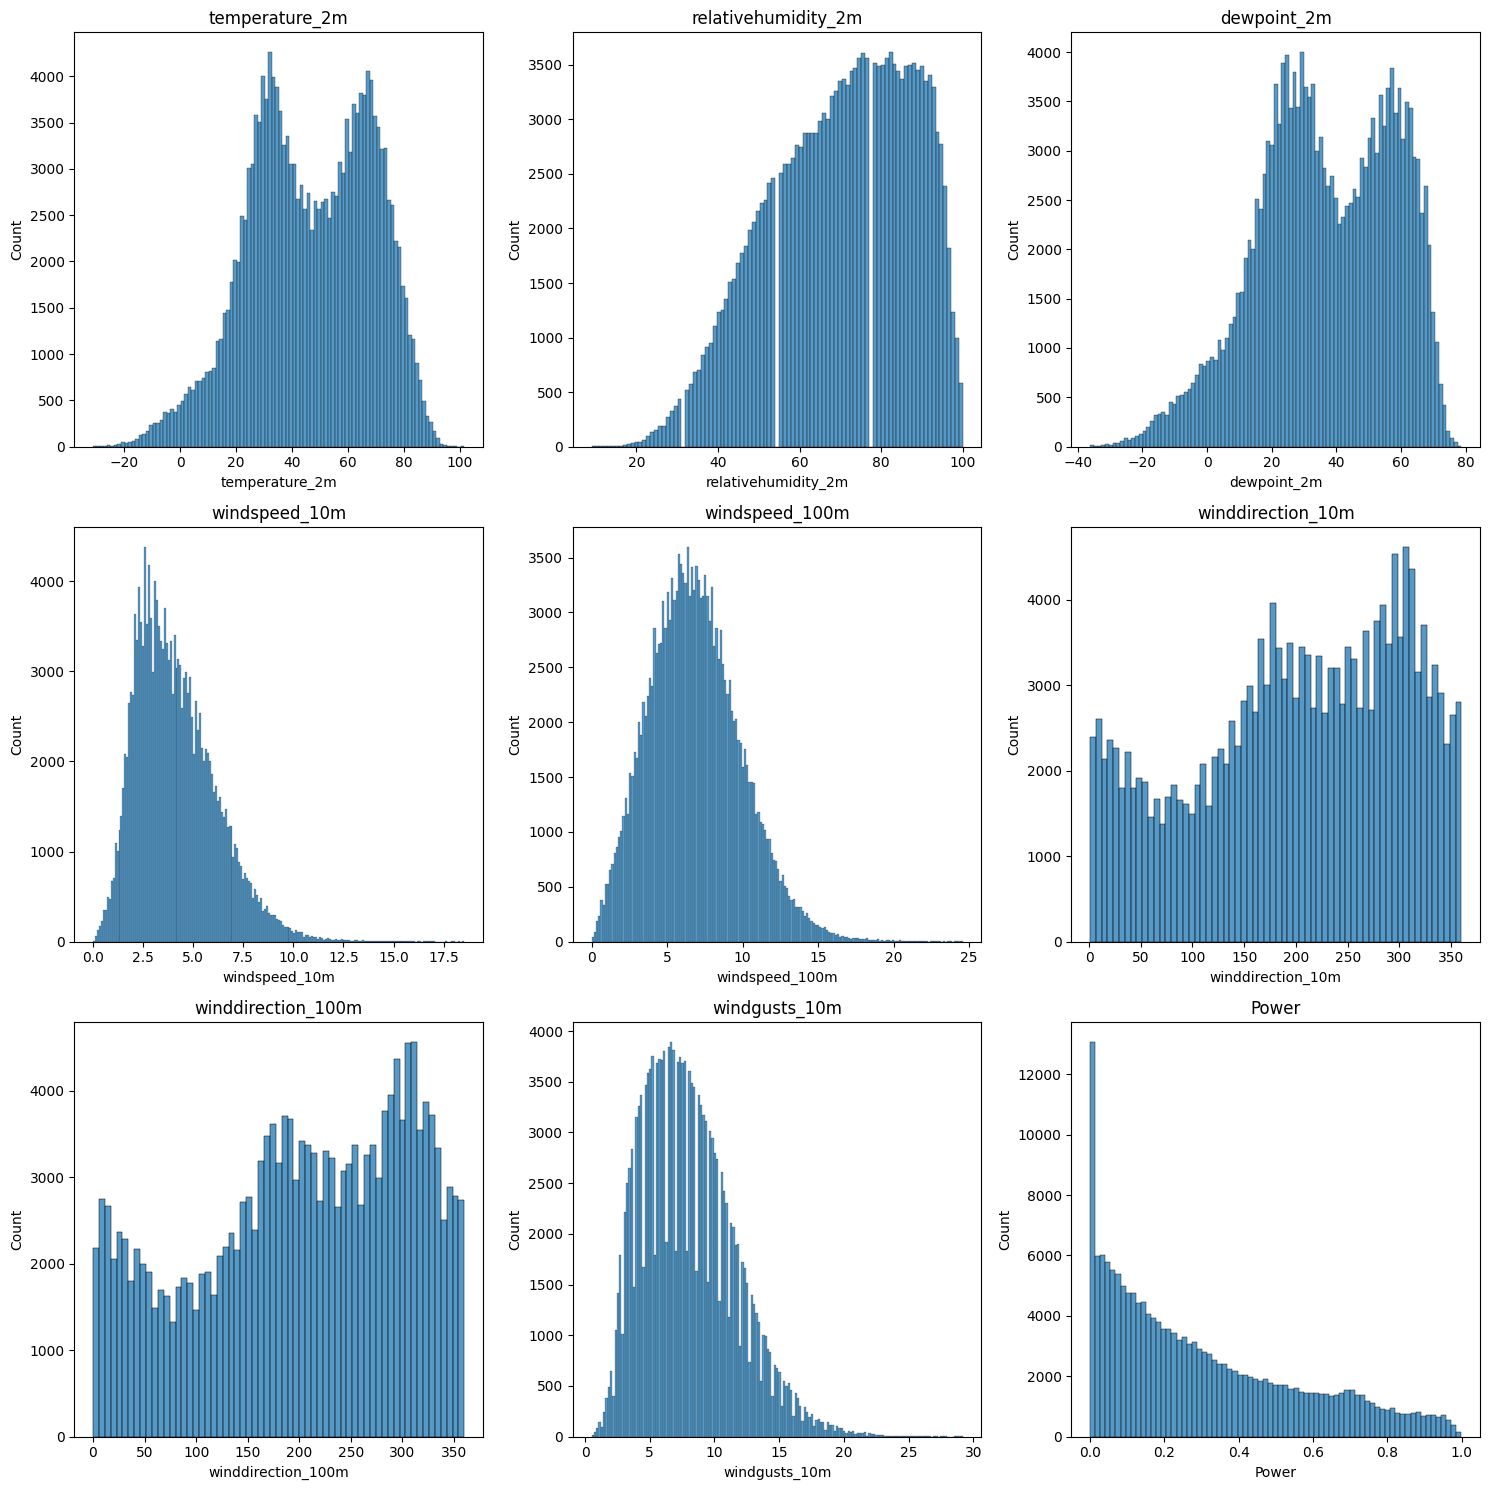

In [20]:
# let's plot the subplots for the data distribution of each numerical columns
fig, axes=plt.subplots(3, 3, figsize=(15,15))
axes=axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(merged_dataset[col],ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

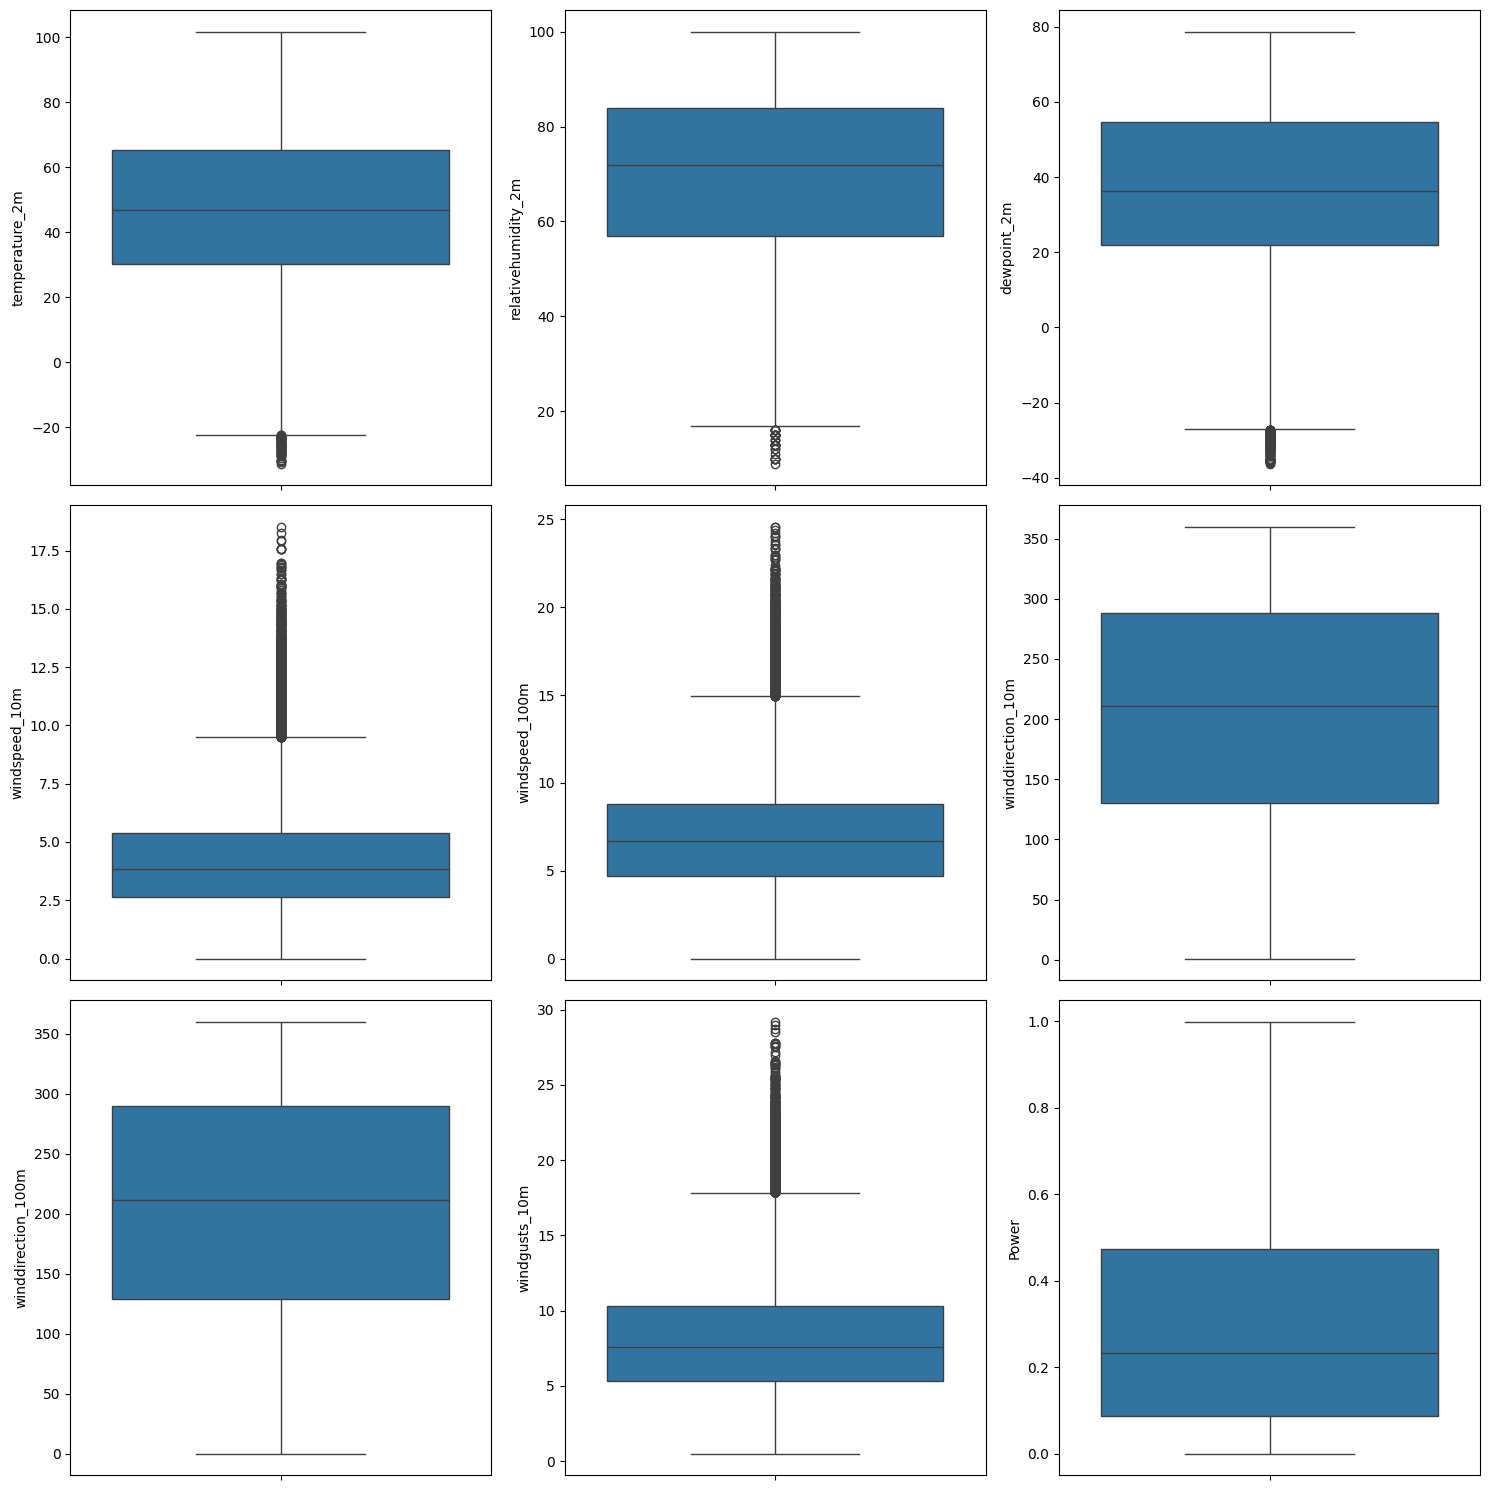

In [21]:
# let's create the box plot
fig, axes=plt.subplots(3,3,figsize=(15,15))
axes=axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(merged_dataset[col],ax=axes[i])
plt.tight_layout()
plt.show()    

In [42]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Time                 131400 non-null  datetime64[ns]
 1   temperature_2m       131400 non-null  float64       
 2   relativehumidity_2m  131400 non-null  int64         
 3   dewpoint_2m          131400 non-null  float64       
 4   windspeed_10m        131400 non-null  float64       
 5   windspeed_100m       131400 non-null  float64       
 6   winddirection_10m    131400 non-null  int64         
 7   winddirection_100m   131400 non-null  int64         
 8   windgusts_10m        131400 non-null  float64       
 9   Power                131400 non-null  float64       
 10  Location             131400 non-null  object        
 11  month                131400 non-null  int32         
 12  day                  131400 non-null  int32         
 13  hour          

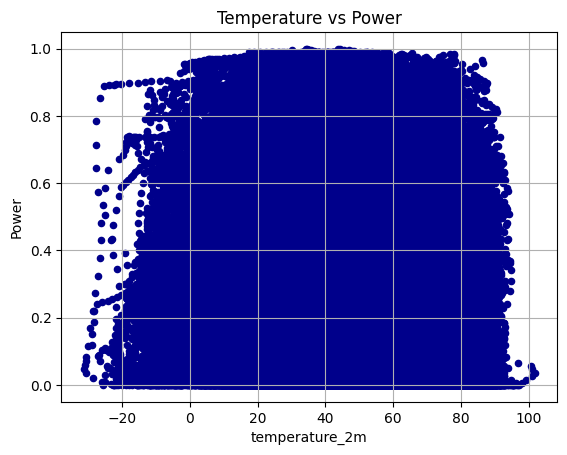

In [24]:
# let's use scatter plot to see the relationship beetwen temp and power
merged_dataset.plot.scatter(x='temperature_2m',y='Power',c='DarkBlue')
plt.xlabel='Temperature'
plt.ylabel='Power'
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()


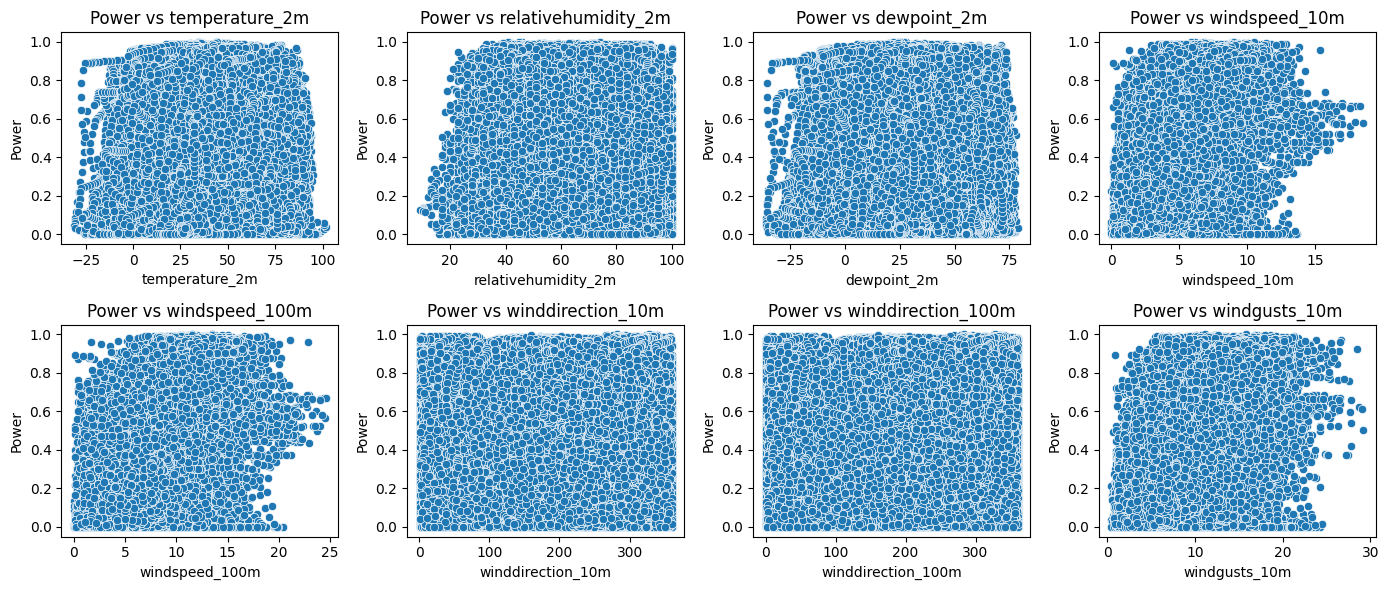

In [28]:
# creating multiple plot to see relation btw cols and power 
fig,axes=plt.subplots(2,4,figsize=(14,6))
axe=axes.flatten()
for i,col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col,y='Power',data=merged_dataset,ax=axe[i])
    axe[i].set_title(f'Power vs {col}')
    axe[i].set_xlabel(col)
    axe[i].set_ylabel('Power')
plt.tight_layout()
plt.show()    

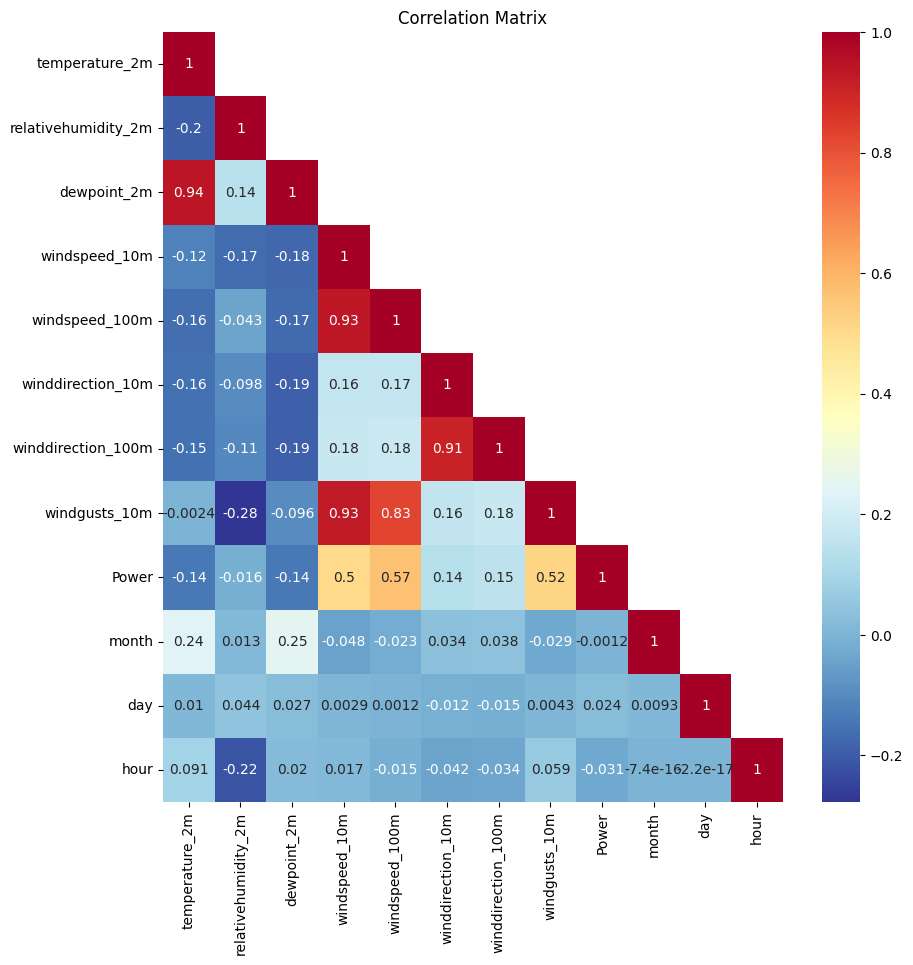

In [49]:
#check the correlation of the btw cols and power
correlation=merged_dataset[numerical_columns].corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(10,10))
sns.heatmap(correlation,mask=mask,annot=True, cmap = 'RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'power(MW)')

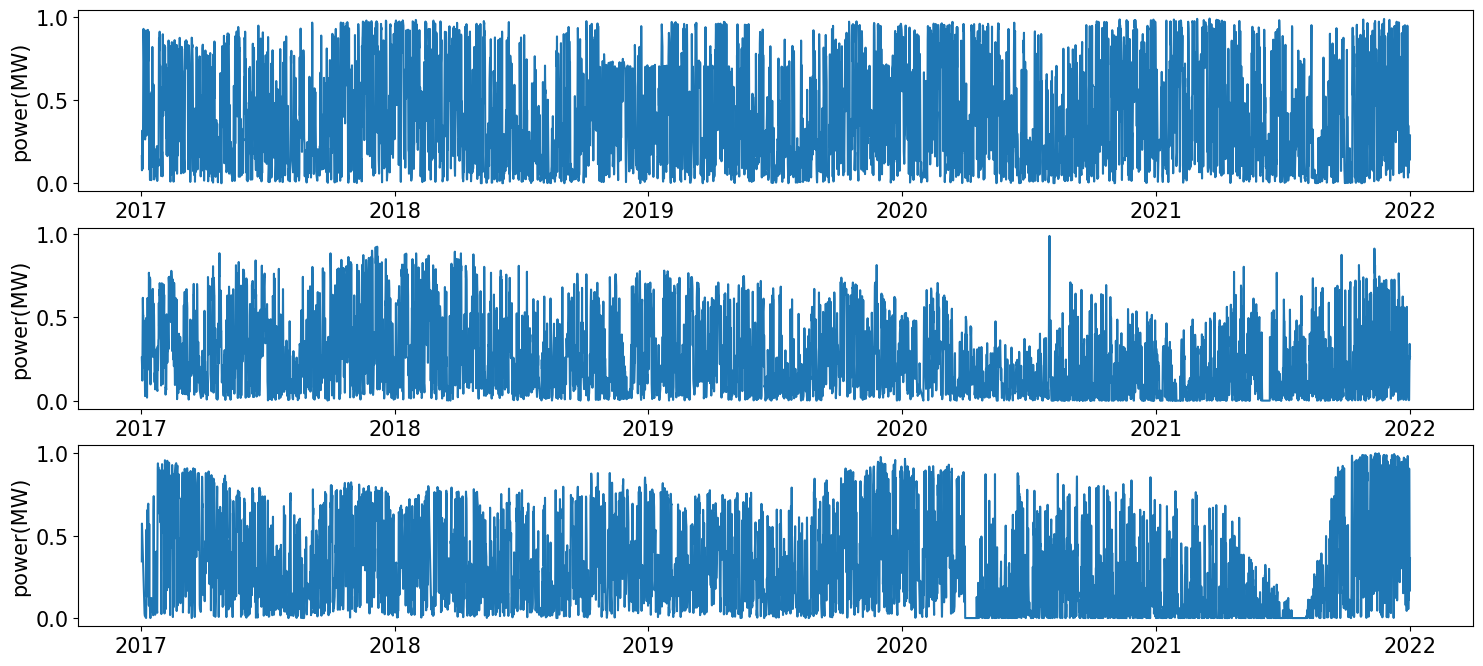

In [8]:
timelook = merged_dataset[merged_dataset['Location']=='location1']['Time']
power1 = merged_dataset[merged_dataset['Location']=='location1']['Power']
power2 = merged_dataset[merged_dataset['Location']=='location2']['Power']
power3 = merged_dataset[merged_dataset['Location']=='location3']['Power']
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(311)
plt.tick_params(labelsize=15)
plt.plot_date(timelook, power1,'-')
#plt.xlabel('时间',fontsize=15)
plt.ylabel('power(MW)',fontsize=15)

ax =  fig.add_subplot(312)
plt.tick_params(labelsize=15)
plt.plot_date(timelook, power2,'-')
#plt.xlabel('时间',fontsize=15)
plt.ylabel('power(MW)',fontsize=15)

ax =  fig.add_subplot(313)
plt.tick_params(labelsize=15)
plt.plot_date(timelook, power3,'-')
#plt.xlabel('时间',fontsize=15)
plt.ylabel('power(MW)',fontsize=15)

In [9]:
def create_lag_features(data, target_col='Power', n_lags=24, forecast_steps=1, drop_original=False):
    """
    为风功率预测构造滞后特征（支持多步预测）
    
    参数:
        data: DataFrame, 必须包含时间索引或时间列
        target_col: str, 目标变量列名（默认为'Power'）
        n_lags: int, 滞后步数（输入历史长度）
        forecast_steps: int, 预测未来步数（如6表示预测未来6小时）
        drop_original: bool, 是否删除原始特征列
    
    返回:
        X: DataFrame, 特征矩阵（滞后特征）
        y: DataFrame, 目标矩阵（未来值）
    """
    # 确保数据按时间排序
    df = data.sort_index().copy()
    
    # 获取所有需要构造滞后的特征列（排除目标列）
    feature_cols = [col for col in df.columns 
                    if col not in [target_col, 'Time', 'Location']]
    
    print(f"原始数据形状: {df.shape}")
    print(f"目标变量: {target_col}")
    print(f"输入滞后: {n_lags}步")
    print(f"预测步数: {forecast_steps}步")
    print(f"构造滞后的特征: {feature_cols}")
    
    # 1. 构造输入特征（过去n_lags）
    X_dict = {}
    for col in feature_cols:
        for lag in range(1, n_lags + 1):
            X_dict[f'{col}_lag{lag}'] = df[col].shift(lag)
    
    # 2. 构造目标变量（未来forecast_steps）
    y_dict = {}
    for step in range(1, forecast_steps + 1):
        y_dict[f'{target_col}_step{step}'] = df[target_col].shift(-step)
    
    # 合并并删除NaN
    X_df = pd.DataFrame(X_dict, index=df.index)
    y_df = pd.DataFrame(y_dict, index=df.index)
    
    # 删除包含NaN的行（前n_lags行和后forecast_steps行）
    combined = pd.concat([X_df, y_df], axis=1).dropna()
    
    # 分离特征和目标
    X = combined.iloc[:, :-forecast_steps]
    y = combined.iloc[:, -forecast_steps:]
    
    # 3. 可选：删除原始特征列
    if drop_original:
        # 删除原始列，但保留构造的滞后列
        cols_to_drop = []
        for col in ['Time', 'Location', target_col]:
            if col in df.columns and col in combined.columns:
                cols_to_drop.append(col)
        
        # 只删除原始列，不删除滞后列
        for col in feature_cols:
            if col in combined.columns:
                cols_to_drop.append(col)
        
        cols_to_drop = list(set(cols_to_drop))  # 去重
        X = X.drop(columns=cols_to_drop, errors='ignore')
        
        print(f"已删除原始列: {cols_to_drop}")
    
    print(f"滞后构造后形状:")
    print(f"  X: {X.shape}")
    print(f"  y: {y.shape}")
    
    return X, y

In [92]:
location1.tail
location1['Time'] = pd.to_datetime(location1['Time'])


In [10]:
lag_input1,label1 = create_lag_features(location1, target_col='Power', n_lags=6, forecast_steps=12, drop_original=True)


原始数据形状: (43800, 11)
目标变量: Power
输入滞后: 6步
预测步数: 12步
构造滞后的特征: ['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m']
已删除原始列: []
滞后构造后形状:
  X: (43782, 48)
  y: (43782, 12)


In [152]:
lag_input1.columns

Index(['temperature_2m_lag1', 'temperature_2m_lag2', 'temperature_2m_lag3',
       'temperature_2m_lag4', 'temperature_2m_lag5', 'temperature_2m_lag6',
       'relativehumidity_2m_lag1', 'relativehumidity_2m_lag2',
       'relativehumidity_2m_lag3', 'relativehumidity_2m_lag4',
       'relativehumidity_2m_lag5', 'relativehumidity_2m_lag6',
       'dewpoint_2m_lag1', 'dewpoint_2m_lag2', 'dewpoint_2m_lag3',
       'dewpoint_2m_lag4', 'dewpoint_2m_lag5', 'dewpoint_2m_lag6',
       'windspeed_10m_lag1', 'windspeed_10m_lag2', 'windspeed_10m_lag3',
       'windspeed_10m_lag4', 'windspeed_10m_lag5', 'windspeed_10m_lag6',
       'windspeed_100m_lag1', 'windspeed_100m_lag2', 'windspeed_100m_lag3',
       'windspeed_100m_lag4', 'windspeed_100m_lag5', 'windspeed_100m_lag6',
       'winddirection_10m_lag1', 'winddirection_10m_lag2',
       'winddirection_10m_lag3', 'winddirection_10m_lag4',
       'winddirection_10m_lag5', 'winddirection_10m_lag6',
       'winddirection_100m_lag1', 'winddirection_1

In [150]:
#x=lag_input1.iloc[:,1:]
#y=lag_input1['Power']
lag_input1.info


<bound method DataFrame.info of        temperature_2m_lag1  temperature_2m_lag2  temperature_2m_lag3  \
12                    36.2                 35.6                 34.0   
13                    36.2                 36.2                 35.6   
14                    35.9                 36.2                 36.2   
15                    36.2                 35.9                 36.2   
16                    35.4                 36.2                 35.9   
...                    ...                  ...                  ...   
43783                 36.2                 34.5                 33.3   
43784                 35.6                 36.2                 34.5   
43785                 34.9                 35.6                 36.2   
43786                 36.7                 34.9                 35.6   
43787                 38.1                 36.7                 34.9   

       temperature_2m_lag4  temperature_2m_lag5  temperature_2m_lag6  \
12                    30.2     

In [11]:
X_train, X_val, y_train, y_val = train_test_split(lag_input1, label1, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
# 构建随机森林回归模型
rf_reg = RandomForestRegressor(n_estimators=50, random_state=42)
rf_reg.fit(X_train, y_train)
print('随机森林:')
print("Traing Score:%f" % rf_reg.score(X_train, y_train))
print("Testing Score:%f" % rf_reg.score(X_val, y_val))

随机森林:
Traing Score:0.939172
Testing Score:0.577838


In [14]:
#构建xgboost模型
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(n_estimators=50, random_state=42,
                            max_depth=7,          # 先试5，过拟合调小（3），欠拟合调大（7）
                            learning_rate=0.08,    # 学习率0.1
                            reg_lambda=2,   # L2正则化
                            reg_alpha=0.5, )       # L1正则化      
xgb_reg.fit(X_train, y_train, verbose=True)
print('xgboost:')
print("Traing Score:%f" % xgb_reg.score(X_train, y_train))
print("Testing Score:%f" % xgb_reg.score(X_val, y_val))

xgboost:
Traing Score:0.609768
Testing Score:0.525140


In [18]:
location2['Time'] = pd.to_datetime(location2['Time'])
lag_input2,label2 = create_lag_features(location2, target_col='Power', n_lags=6,forecast_steps=12, drop_original=True)
#test_x=lag_input2.iloc[:,1:]
print('test x shape:',lag_input2.shape)
#test_y=lag_input2['Power']
print('test y shape:',label2.shape)

原始数据形状: (43800, 11)
目标变量: Power
输入滞后: 6步
预测步数: 12步
构造滞后的特征: ['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m', 'windspeed_100m', 'winddirection_10m', 'winddirection_100m', 'windgusts_10m']
已删除原始列: []
滞后构造后形状:
  X: (43782, 48)
  y: (43782, 12)
test x shape: (43782, 48)
test y shape: (43782, 12)


In [19]:
rf_pre = rf_reg.predict(lag_input2)
xgb_pre = xgb_reg.predict(lag_input2)

In [20]:
RF_R2_1 = r2_score(label2, rf_pre)
XGB_R2_1 = r2_score(label2, xgb_pre)
print(RF_R2_1,XGB_R2_1)

-1.3144784051134208 -1.310165524482727


随机森林


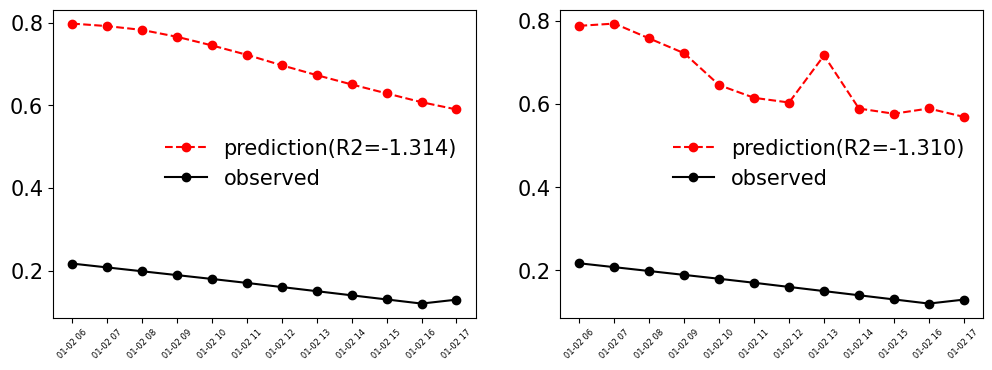

In [22]:
import matplotlib.font_manager as font_manager
from matplotlib.dates import HourLocator
fig = plt.figure(figsize=(12,4))
print('随机森林')
ax = fig.add_subplot(121)
plt.tick_params(labelsize=15)
plt.plot_date(location2['Time'].iloc[6:18], rf_pre[0],'ro--',label='prediction(R2={:.3f})'.format(RF_R2_1))
plt.plot_date(location2['Time'].iloc[6:18], label2.iloc[0],'ko-',label='observed')
ax.xaxis.set_major_locator(HourLocator(byhour=range(0,24,1)))
# 设置x轴标签大小和旋转
plt.xticks(rotation=45, fontsize=6)  # 旋转45度，字体大小10
plt.legend(fontsize=15, frameon=False)

ax = fig.add_subplot(122)
plt.tick_params(labelsize=15)
plt.plot_date(location2['Time'].iloc[6:18], xgb_pre[0],'ro--',label='prediction(R2={:.3f})'.format(XGB_R2_1))
plt.plot_date(location2['Time'].iloc[6:18], label2.iloc[0],'ko-',label='observed')
ax.xaxis.set_major_locator(HourLocator(byhour=range(0,24,1)))
# 设置x轴标签大小和旋转
plt.xticks(rotation=45, fontsize=6)  # 旋转45度，字体大小10
plt.legend(fontsize=15, frameon=False)